<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [7]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [8]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [9]:
boston_df.head(10)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


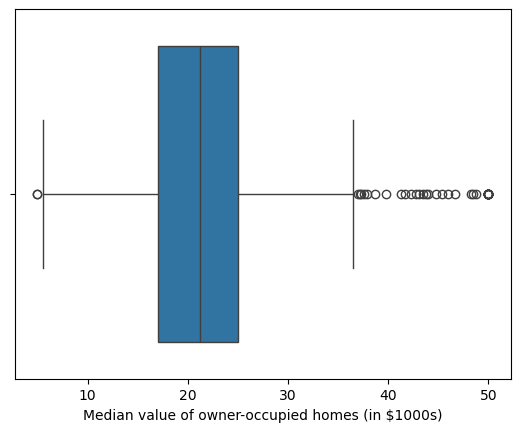

In [13]:
#For the "Median value of owner-occupied homes" provide a boxplot
ax = sns.boxplot(x='MEDV', data=boston_df)
plt.xlabel('Median value of owner-occupied homes (in $1000s)')
plt.show()

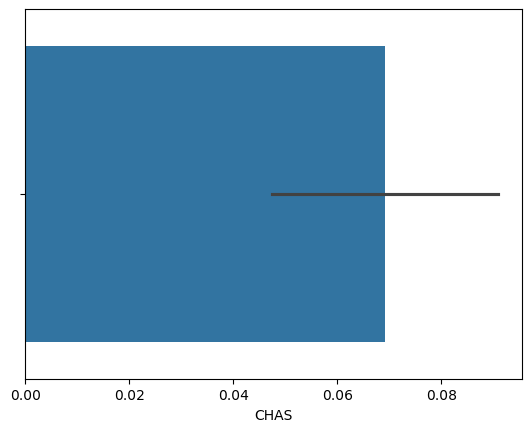

In [22]:
#Provide a  bar plot for the Charles river variable
sns.barplot(boston_df, x="CHAS")
plt.show()

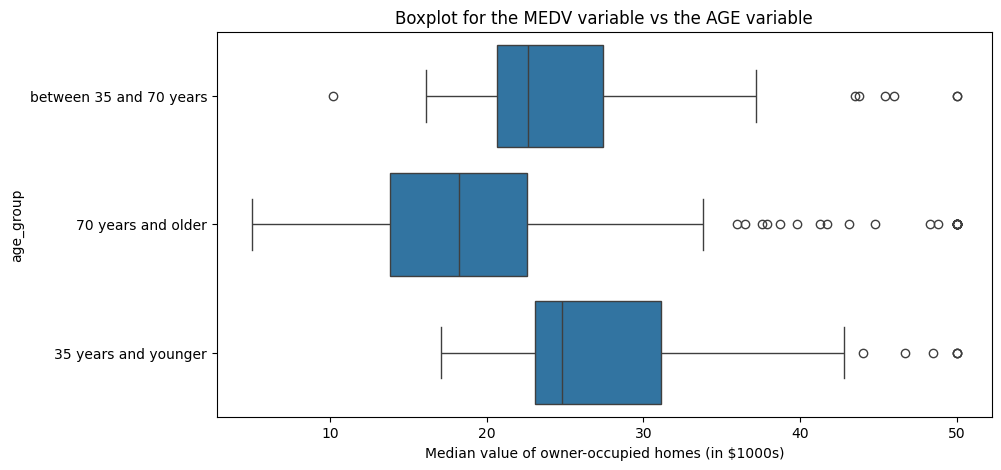

In [17]:
#Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'
plt.figure(figsize=(10,5))
sns.boxplot(x=boston_df.MEDV, y=boston_df.age_group, data=boston_df)
plt.title("Boxplot for the MEDV variable vs the AGE variable")
plt.xlabel('Median value of owner-occupied homes (in $1000s)')
plt.show()

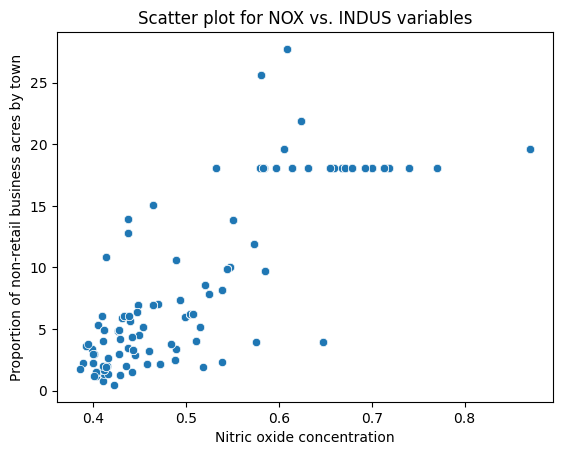

In [19]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.
ax2 = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.title('Scatter plot for NOX vs. INDUS variables')
plt.xlabel('Nitric oxide concentration')
plt.ylabel('Proportion of non-retail business acres by town')
plt.show()

Text(0.5, 1.0, 'Pupil-to-Teacher ratio by town')

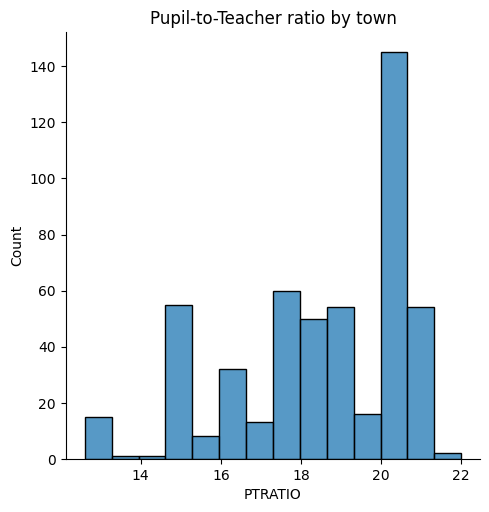

In [20]:
#Create a histogram for the pupil to teacher ratio variable
ax = sns.displot(boston_df['PTRATIO'])
plt.title('Pupil-to-Teacher ratio by town')

In [24]:
#Task 3: Use the appropriate tests to answer the questions provided.
#Throughout, assume the alpha level for significance is 0.05.

In [25]:
#Q1: Is there a significant difference in median value of houses bounded by the Charles river or not? 
#(T-test for independent samples)
#Null hypothesis: 
#	->H_0 : \mu_1 = \mu_2, i.e., there is no significant difference in means between these groups. 
#Alternative hypothesis:
#	->H_1: \mu_1 \neq \mu_2, i.e., there is a significant difference in means between median value of owner-occupied homes that are bounded by the Charles river and those that are not. 
a = boston_df[boston_df["CHAS"] == 0]["MEDV"]
b = boston_df[boston_df["CHAS"] == 1]["MEDV"]
scipy.stats.ttest_ind(a,b,axis=0,equal_var=True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

In [27]:
#Since the p-value is less than 0.05, we have sufficient evidence to reject the null hypothesis
#and conclude there is a statistical difference in median value of owner-occupied homes and
#proximity to the Charles river.

In [31]:
#Q2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied 
#units built prior to 1940 (AGE)? 
#(ANOVA)
#	Null hypothesis: 
#	-> H_0 : \mu_1 = \mu_2 =\mu_2 
#	Alternative hypothesis:
#	-> H_1: \mu_1 != \mu_2 or \mu_1 != \mu_3 or \mu_2 != \mu_3
low = boston_df[boston_df["age_group"] == '35 years and younger']["MEDV"]
mid = boston_df[boston_df["age_group"] == 'between 35 and 70 years']["MEDV"]
high = boston_df[boston_df["age_group"] == '70 years and older']["MEDV"]
scipy.stats.f_oneway(low,mid,high,axis=0)

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

In [29]:
#Since the p-value is less than 0.05, so we reject the null hypothesis and conclude there exists enough evidence that
#the difference in MEDV across age_groups is statistically significant.

In [32]:
#Q3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? 
#(Pearson Correlation)
#	Null hypothesis:
#	->There is no relationship between the nitric oxide concentrations and proportion of non-retail business acres per town.
#	Alternative hypothesis:
#	->there is a statistically significant correlation between these variables.
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [33]:
#Since the p-value is less than 0.05, we reject the null hypothesis and conclude there is a 
#statistically significant correlation between these variables. 
#The Pearson correlation statistic is 0.75, which indicates a high degree of correlation. 

In [34]:
#Q4: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? 
#(Regression analysis)
#	Null hypothesis: 
#	->there is no significant impact of this weighted distance on the median value of owner-occupied homes.
#	Alternative hypothesis:
#	->there is a significant impact of the weighted distance to the five Boston employment centers on the median value of owner-occupied homes. 
y = boston_df['MEDV']
x = boston_df['DIS']
x = sm.add_constant(x)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 01 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        14:38:01   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
np.sqrt(0.062) #Pearson correlation coefficient

0.24899799195977465